In [76]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import psycopg2 as pg
import pandas.io.sql as psql
conn = pg.connect(database = "sql-challenge", user = "postgres", password = "XXXXXXXX")
salaries = pd.read_sql('SELECT * FROM "salaries"', conn)
salaries

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000,1997-06-02,1998-06-02
300020,499996,58058,1996-05-13,1997-05-13
300021,499997,49597,1987-08-30,1988-08-29
300022,499998,40000,1993-12-27,1994-12-27


Text(0, 0.5, 'Employees')

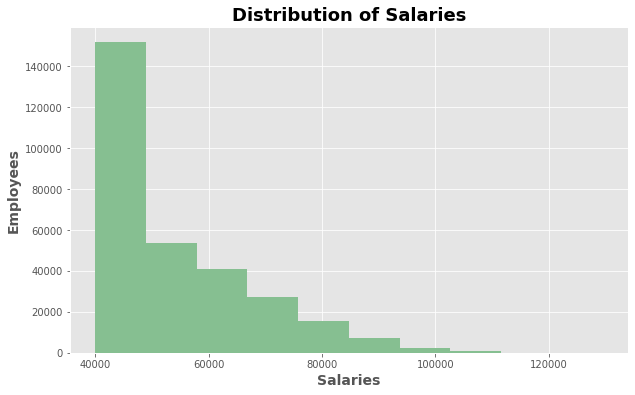

In [84]:
salaries.hist(column='salary', bins=10, grid=True, figsize=(10,6), color='#86bf91', zorder=2)
plt.title("Distribution of Salaries", weight='bold', size=18)
plt.xlabel("Salaries", weight='bold', size=14)
plt.ylabel("Employees", weight='bold', size=14)

In [78]:
titles = pd.read_sql('SELECT * FROM "titles"', conn)
salary_titles = pd.merge(salaries, titles, on = "emp_no", how = "inner")
salary_titles = salary_titles.drop(['emp_no', 'from_date_x', 'to_date_x', 'from_date_y', 'to_date_y', 'id'], axis=1)
salary_titles = salary_titles[['title', 'salary']]
salary_titles = salary_titles.groupby('title').mean()
salary_titles

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

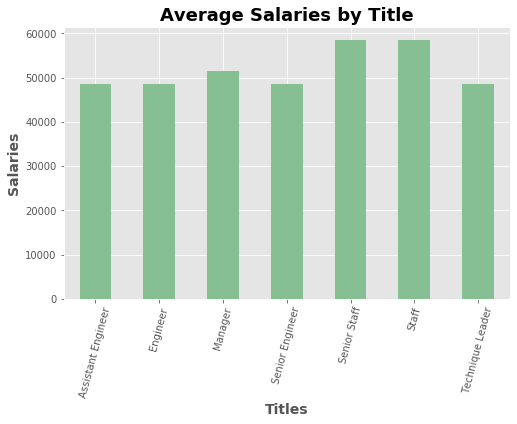

In [86]:
salary_titles['salary'].plot(kind='bar', figsize=(8,5), color='#86bf91', grid=True)
plt.title("Average Salaries by Title", weight='bold', size=18)
plt.xlabel("Titles", weight='bold', size=14)
plt.ylabel("Salaries", weight='bold', size=14)
plt.xticks(rotation=75)